In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud



In [1]:

train = pd.read_csv('/content/train_tweet.csv')
test = pd.read_csv('/content/test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [2]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [4]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

<Axes: >

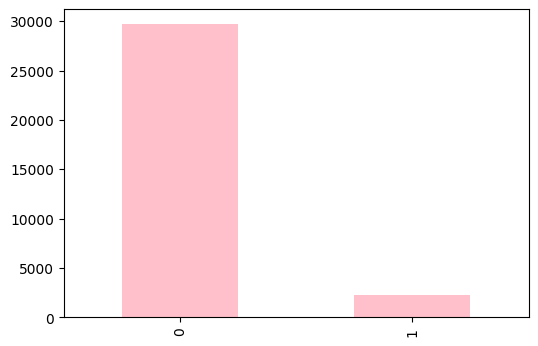

In [5]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

# checking out the postive comments from the train set

train[train['label'] == 1].head(10)

train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

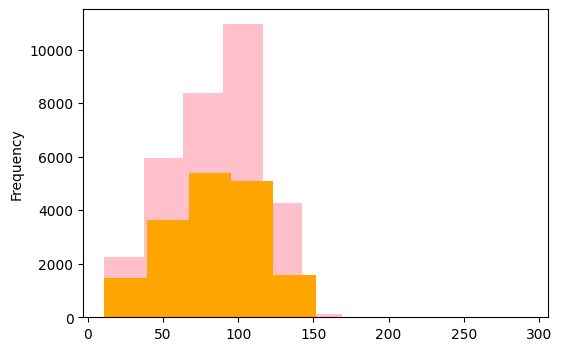

In [6]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))


In [7]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

<ipython-input-9-2cba4189e80b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('len').mean()['label'].plot.hist(color = 'grey', figsize = (6, 4),)


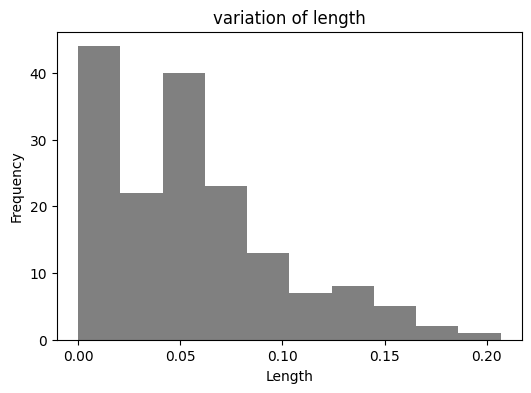

In [9]:
train.groupby('len').mean()['label'].plot.hist(color = 'grey', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

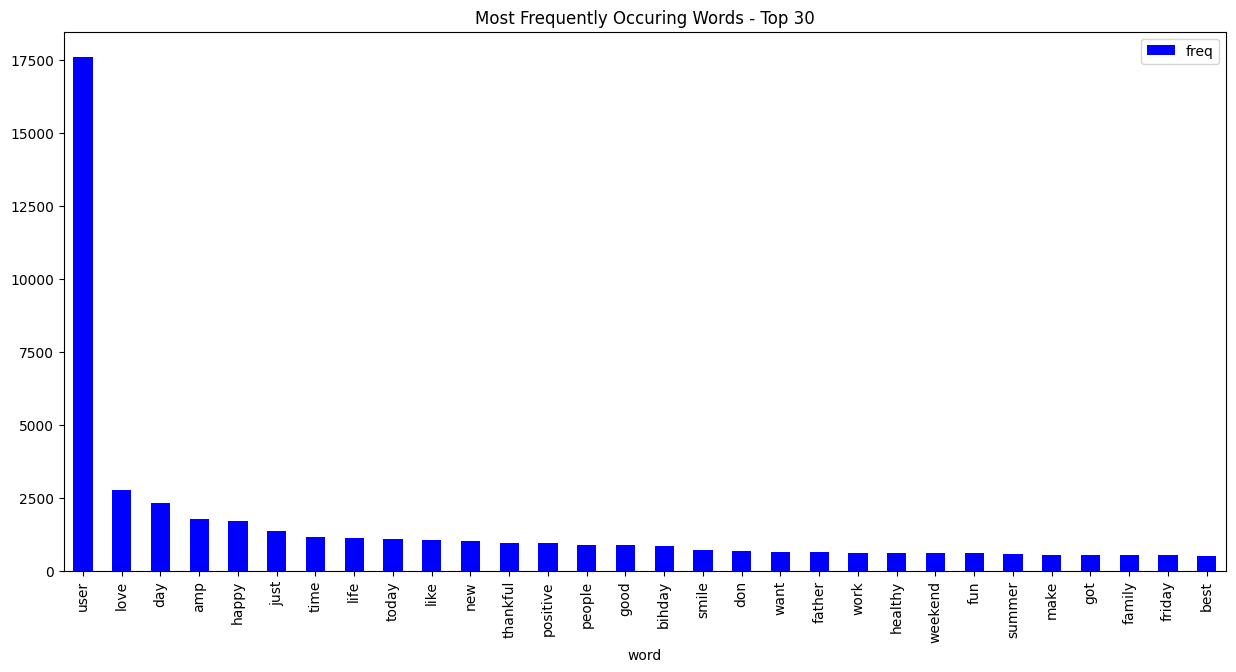

In [11]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

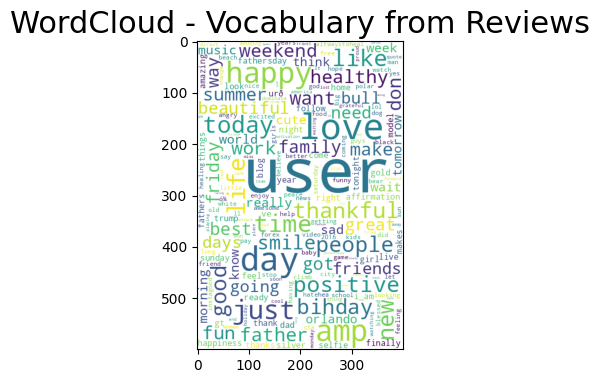

In [43]:
wordcloud = WordCloud(background_color = 'white', width = 400, height = 600).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(5,4))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

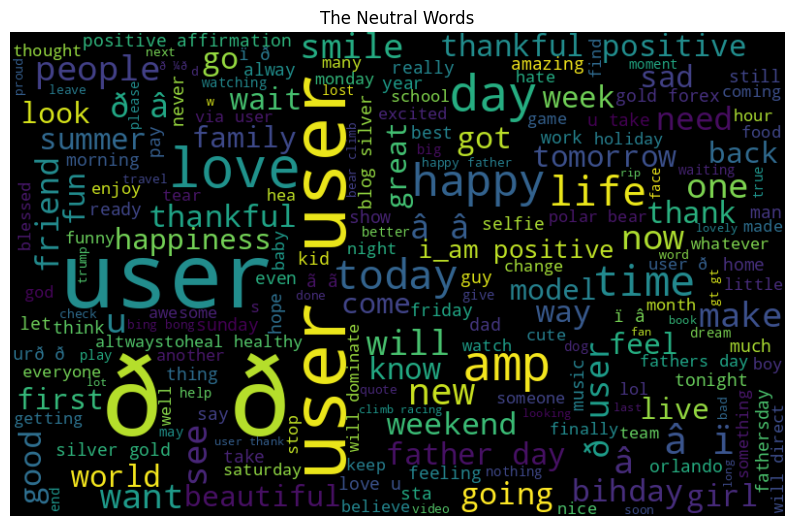

In [14]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

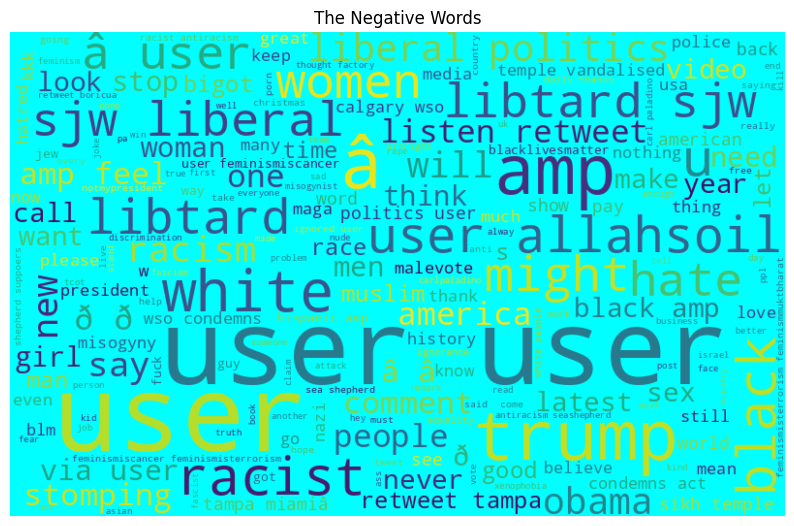

In [15]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [16]:
def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [20]:
import nltk

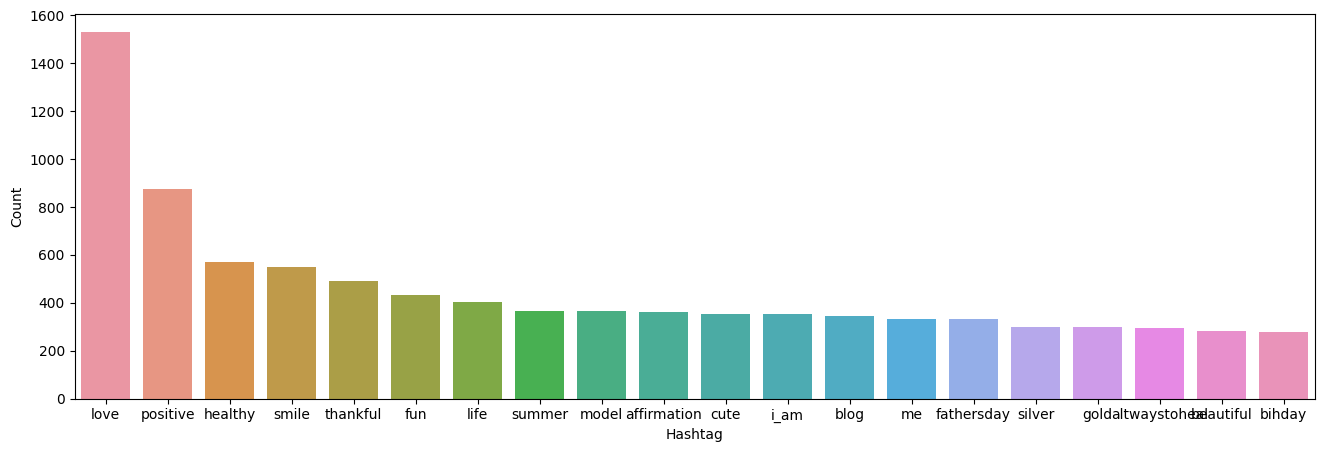

In [21]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

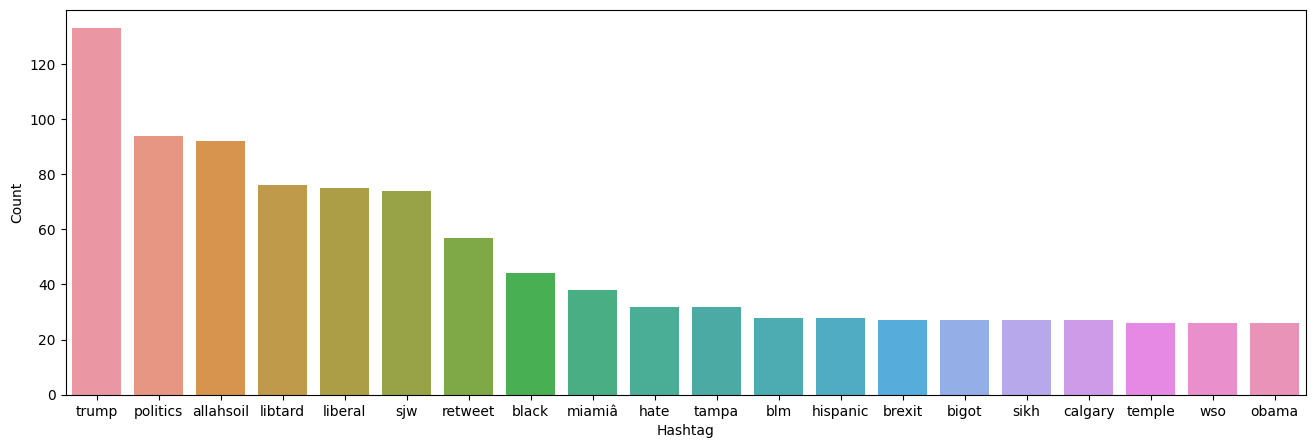

In [22]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [26]:
import gensim

In [27]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6108748, 8411580)

In [28]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6326547861099243),
 ('#prosecco', 0.5938733816146851),
 ('#restaurant', 0.5779544711112976),
 ('#womens', 0.5744702219963074),
 ('podium', 0.573160707950592),
 ('toes', 0.5729140639305115),
 ('#boardgames', 0.5681232213973999),
 ('7!', 0.5679262280464172),
 ('#burgers', 0.5670062899589539),
 ('coaching', 0.5661918520927429)]

In [29]:
model_w2v.wv.most_similar(positive = "cancer")


[('level.', 0.7254092693328857),
 ('#survivor', 0.7045639157295227),
 ('solution', 0.702589750289917),
 ('harassment', 0.7024106383323669),
 ('champion,', 0.702168881893158),
 ('law.', 0.7020284533500671),
 ('ownership', 0.6991519927978516),
 ("society's", 0.6958051323890686),
 ("women's", 0.6941295862197876),
 ('behavior.', 0.6921769976615906)]

In [30]:
model_w2v.wv.most_similar(positive = "apple")


[('"mytraining"', 0.7094762325286865),
 ('mytraining', 0.7014716863632202),
 ('training"', 0.6793444752693176),
 ('app,', 0.6448948383331299),
 ('app', 0.5995050668716431),
 ('"my', 0.5980491042137146),
 ('ta', 0.5642167329788208),
 ('humans.', 0.5638602375984192),
 ('heroku', 0.5610089302062988),
 ('#appleta', 0.5511542558670044)]

In [31]:
model_w2v.wv.most_similar(negative = "hate")

[('â\x9c\x88ï¸\x8f', 0.031659457832574844),
 ('#staup', 0.02489592134952545),
 ('#foodie', 0.018508708104491234),
 ('hotel', 0.01541821751743555),
 ('de', 0.01374725066125393),
 ('#tgif', 0.012261293828487396),
 ('spain', 0.008199208416044712),
 ('#fridayfeeling', 0.006580267567187548),
 ('ð\x9f\x8d»', 0.0043704514391720295),
 ('#ready', 0.0008846844430081546)]

In [33]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:

train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [35]:

test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [36]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [37]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [39]:

# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [40]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9524465023151045
F1 score : 0.6184738955823292
[[7303  129]
 [ 251  308]]


In [41]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
f1 score : 0.4986876640419947
[[7419   13]
 [ 369  190]]
